In [1]:
# importing
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_height = 180
img_width = 180
batch_size = 20
data_dir = "Data"

In [2]:
# finding training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  "Data",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 794 files belonging to 42 classes.
Using 636 files for training.


In [3]:
# set up validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  "Data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 794 files belonging to 42 classes.
Using 158 files for validation.


In [4]:
# making sure class names are right
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Arrow Down Blue', 'Arrow Down Green', 'Arrow Down Red', 'Arrow Down White', 'Arrow Left Blue', 'Arrow Left Green', 'Arrow Left Red', 'Arrow Left White', 'Arrow Right Blue', 'Arrow Right Green', 'Arrow Right Red', 'Arrow Right White', 'Arrow Up Blue', 'Arrow Up Green', 'Arrow Up Red', 'Arrow Up White', 'Circle', 'Letter A', 'Letter B', 'Letter C', 'Letter D', 'Letter E', 'Letter F', 'Letter G', 'Letter H', 'Letter T', 'Letter U', 'Letter V', 'Letter W', 'Letter X', 'Letter Y', 'Letter Z', 'Marker']


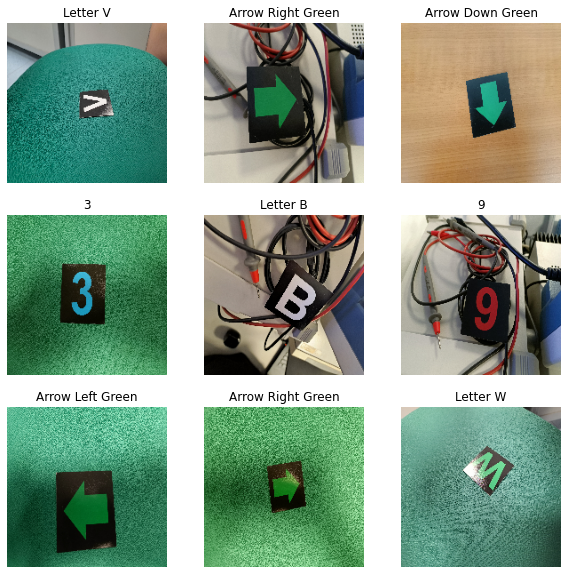

In [5]:
# displaying first few images as reference
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
# idk what this does
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 3)
(20,)


In [7]:
# tuning tensorflow for speed
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# normalization?
# i think this is pre-processing
normalization_layer = layers.Rescaling(1./255)

In [9]:
# i think this is pre-processing 
# this should be part of pre-processing
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [10]:
# idk what this does
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
# probably more pre-processing
data_augmentation = keras.Sequential(
  [
    # layers.RandomFlip("horizontal",
    #                   input_shape=(img_height,
    #                               img_width,
    #                               3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.5),
  ]
)

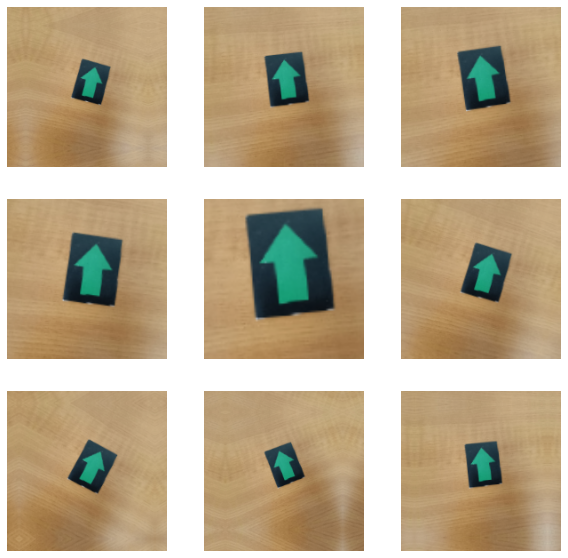

In [37]:
# displaying pre-processed images
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [38]:
# creating the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# it's... a summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [40]:
# training!
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
32/32 [==============================] - 6s 171ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 6.8153 - val_accuracy: 0.3987
Epoch 2/30
32/32 [==============================] - 12s 391ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 7.2686 - val_accuracy: 0.4114
Epoch 3/30
32/32 [==============================] - 6s 188ms/step - loss: 0.0326 - accuracy: 0.9921 - val_loss: 6.1136 - val_accuracy: 0.3734
Epoch 4/30
32/32 [==============================] - 6s 175ms/step - loss: 0.0463 - accuracy: 0.9827 - val_loss: 5.1269 - val_accuracy: 0.4304
Epoch 5/30
32/32 [==============================] - 6s 179ms/step - loss: 0.0402 - accuracy: 0.9937 - val_loss: 5.9493 - val_accuracy: 0.3924
Epoch 6/30
32/32 [==============================] - 7s 209ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 4.7298 - val_accuracy: 0.4114
Epoch 7/30
32/32 [==============================] - 7s 220ms/step - loss: 0.0567 - accuracy: 0.9890 - val_loss: 5.6370 - val_accuracy: 0.4051
Epoch

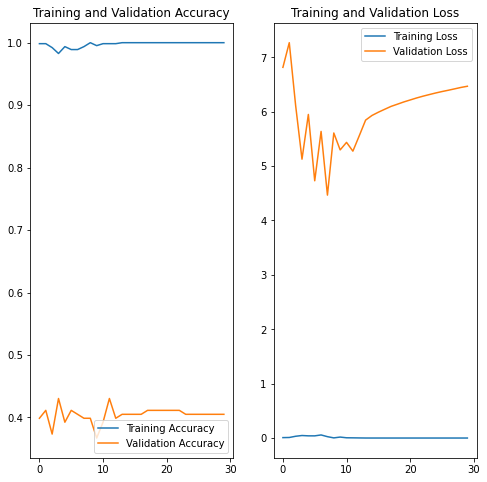

In [41]:
# displaying how accurate it is
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
# loading in an image to test the accuracy

# if you want to try your own image or something just
# change the validation_path variable
validation_path = "D:\OneDrive\Pictures\Camera Roll\IMG20230127130924.jpg"

img = tf.keras.utils.load_img(
    validation_path,
    target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Letter A with a 83.56 percent confidence.


In [46]:
# saving the model for later conversion
tf.keras.Model.save(model, "D:\OneDrive - Nanyang Technological University\Year 2 Sem 2\SC2079 MDP\Tensor_Testing\Keras_Model")

INFO:tensorflow:Assets written to: D:\OneDrive - Nanyang Technological University\Year 2 Sem 2\SC2079 MDP\Tensor_Testing\Keras_Model\assets


In [47]:
# Convert the model from saved tensor model to tensorflow lite model
converter = tf.lite.TFLiteConverter.from_saved_model("D:\OneDrive - Nanyang Technological University\Year 2 Sem 2\SC2079 MDP\Tensor_Testing\Keras_Model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [48]:
# creating interpreter object to use tflite model
interpreter = tf.lite.Interpreter(model_path="D:\OneDrive - Nanyang Technological University\Year 2 Sem 2\SC2079 MDP\Tensor_Testing\Tensorflow Testing\model.tflite")
interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_1_input'], 'outputs': ['dense_1']}}

In [49]:
# making use of the tflite model
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [50]:
# using the tflite model
predictions_lite = classify_lite(rescaling_1_input=img_array)['dense_1']
score_lite = tf.nn.softmax(predictions_lite)

In [51]:
# testing the tflite model for accuracy
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Letter A with a 83.56 percent confidence.
